# KausikChattapadhyay_DSC540_Week9-10Ex

# Kausik Chattapadhyay

# Date: 02/10/2023

# DSC 540 Week 9-10

**Activity 9: Extracting the Top 100 eBooks from Gutenberg**

Head over to the supplied Jupyter notebook (in the GitHub repository) to work on this activity. These are the steps that will help you solve this activity:

• Import the necessary libraries, including regex and beautifulsoup.

• Check the SSL certificate.

• Read the HTML from the URL. Write a small function to check the status of the web request.

• Decode the response and pass this on to BeautifulSoup for HTML parsing.

• Find all the href tags and store them in the list of links.

• Check what the list looks like – print the first 30 elements.

• Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.

• Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string.

• Use the findall method. What does the soup object’s text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).

• Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday’s ranking).

• Create a starting index. It should point at the text Top 100 Ebooks yesterday.

• Use the splitlines method of soup.text. It splits the lines of text of the soup object. Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method. Use a regular expression to extract only text from the name strings and append it to an empty list.

• Use match and span to find the indices and use them.

In [1]:
# Load the necessary libraries.
import urllib.request, urllib.parse, urllib.error 
import requests 
from bs4 import BeautifulSoup 
import ssl 
import re

In [2]:
#There may be certificate error due to invalid certificates, Ignore this error 
certx = ssl.create_default_context() 
certx.check_hostname = False 
certx.verify_mode = ssl.CERT_NONE

In [5]:
# function to check the response status code, 200 means OK, any other status means the request failed 

def status_check(r):
    if r.status_code==200:
        print("Success!") 
        return 1 
    else:
        print("Failed!") 
        return -1

In [6]:
# Read the HTML from the URL and check the response 
gutenburgurl = 'https://www.gutenberg.org/browse/scores/top' 
response = requests.get(gutenburgurl) 
status_check(response)

Success!


1

In [8]:
# Decode the response and pass on to BeautifulSoup for HTML parsing 

urlContent = response.content.decode(response.encoding) 
soup = BeautifulSoup(urlContent, 'html.parser')

In [9]:
# Find all the href tags and store them in the list of links. 
# Empty list to hold all the http links in the HTML page 

href_list=[] 

for item in soup.find_all('a'):
    href_list.append(item.get('href'))
    
# Check what the list looks like – print the first 30 elements. 
href_list[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [10]:
#Use a regular expression to find the numeric digits in these links. 
# These are the file numbers for the top 100 eBooks.

#Initialize the empty list to hold the file numbers over an appropriate range and use regex to 
# find the numeric digits in the link href string 
# Number 19 to 119 in the original list of links have the Top 100 ebooksnumber.

filenum =[] 

for i in range(19,119):
    link=href_list[i]
    link=link.strip()
    # Use the findall method. What does the soup object's text look like?

    num=re.findall('[0-9]+',link) 
    if len(num)==1:
        # Append the filenumber casted as integer 
        filenum.append(int(num[0]))
        
# Print the file numbers 
print("file numbers for the top 100 ebooks on Gutenberg are\n") 
print(filenum)

file numbers for the top 100 ebooks on Gutenberg are

[1, 1, 7, 7, 30, 30, 1513, 2641, 145, 37106, 16389, 2701, 67979, 100, 394, 6761, 2160, 4085, 6593, 1259, 5197, 84, 1342, 11, 64317, 2542, 1952, 174, 98, 25344, 1080, 408, 345, 1400, 1661, 1260, 844, 43, 5200, 3854, 46, 2591, 2554, 1232, 20228, 4300, 219, 23, 6130, 76, 28054, 69965, 2814, 42108, 1727, 69969, 69970, 1184, 1497, 36, 7370, 215, 2600, 74, 69971, 205, 16328, 3207, 20203, 768, 996, 120, 2852, 16, 45, 5740, 1250, 67098, 55, 5827, 3206, 15399, 11030, 4363, 30254, 42324, 2148, 58585, 3825, 19942, 1399, 514]


In [11]:
# Use the .text method and print only the first 2,000 characters 
# (do not print the whole thing, as it is too long). 

print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-02-07295450
last 7 days1943104
last 30 days7924449



Top 100 EBooks yesterd

In [12]:
# Search in the extracted text (using a regular expression) 
# from the soup object to find the names of the top 100 eBooks (yesterday's ranking).

# Initialize a temp list to hold titles 
title_list_temp =[]

# Creating a start index pointing at the text "Top 100 Ebooks yesterday"

index_start = soup.text.splitlines().index('Top 100 EBooks yesterday')

# Loop 1-100 to add the strings of next 100 lines to this temporary list. 

for item in range(107):
    title_list_temp.append(soup.text.splitlines()[index_start+2+item])

In [13]:
# Use regular expression to extract only text from the name strings and append to an empty list

title_list=[] 
for i in range(7,107):
    id1,id2=re.match('^[a-zA-Z ]*',title_list_temp[i]).span() 
    title_list.append(title_list_temp[i][id1:id2])
    
# Printing List of Titles 
for item in title_list:
    print(item)


Romeo and Juliet by William Shakespeare 
A Room with a View by E
Middlemarch by George Eliot 
Little Women
The Enchanted April by Elizabeth Von Arnim 
Moby Dick
The Blue Castle
The Complete Works of William Shakespeare by William Shakespeare 
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Ferdinand Count Fathom 
The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
History of Tom Jones
Twenty Years After by Alexandre Dumas 
My Life 
Frankenstein
Pride and Prejudice by Jane Austen 
Alice
The Great Gatsby by F
A Doll
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Picture of Dorian Gray by Oscar Wilde 
A Tale of Two Cities by Charles Dickens 
The Scarlet Letter by Nathaniel Hawthorne 
A Modest Proposal by Jonathan Swift 
The Souls of Black Folk by W
Dracula by Bram Stoker 
Great Expectations by Charles Dickens 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Jane Eyre
The Importance of Being Earnest
The Strange Case of Dr
Metamorphosis b

**Activity 10: Building Your Own Movie Database by Reading an API**

The aims of this activity are as follows: To retrieve and print basic data about a movie (the title is entered by the user) from the web (OMDb database) If a poster of the movie can be found, it downloads the file and saves it at a user-specified location These are the steps that will help you solve this activity:

• Import urllib.request, urllib.parse, urllib.error, and json.
• Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.

• Obtain a key and store it in JSON as APIkeys.json.

• Open the APIkeys.json file.

• Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.

• Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.

• Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).

• Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you’re done. This function will save the poster data as an image file.

• Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it’s not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.

• Test the search_movie function by entering Titanic.

• Test the search_movie function by entering “Random_error” (obviously, this will not be found, and you should be able to check whether your error catching code is working properly).

In [14]:
# Loading Libraries 
import urllib.request, urllib.parse, urllib.error 
import json 
from PIL import Image 
import requests 
import pandas as pd
import numpy as np

In [15]:
# read the api key file to get the key 
# Opening JSON file 
f = open('APIKeys.json')

# returns JSON object as 
# a dictionary 
# getting the API Key from file 
apiKey = "" 
apiKeyDict = json.load(f)

for item in apiKeyDict.items():
    apiKey = str(item[1])

In [17]:
# Assing the portal value to variable 
omdbBaseURL = "http://www.omdbapi.com/?"

# variable api key to hold the key value 
apikey = "&apikey=" + apiKey

In [18]:
# Write a utility function called print_json to print the movie data from a JSON file 
# (which we will get from the portal).

def print_json(data):
    for item in data.items():
        keyData = str(item[0]) 
        valData = str(item[1]) 
        if keyData == "Poster":
            # poster contains image, we would download an show the image 
            im = Image.open(requests.get(valData, stream=True).raw) 
            im.show() 
        else:
            print(keyData + " : " + valData + "\n")

In [19]:
# method to get movie details

def search_movie(moviename, serviceurl, apikey):
    try:
        apiURl = serviceurl + "t=" + moviename + apikey
        # calling the api to get response 
        with urllib.request.urlopen(apiURl) as url:
            data = json.loads(url.read().decode())
            
        # check the status of the response 
        status = False 
        for item in data.items():
            if (str(item[0]).lower() == 'response' and str(item[1]).lower() =='true'): 
                status = True
                
        # checking the status of response 
        if(status == False):
            print('Api returned failure response') 
        else:
            # if response is successful then print the data
            print_json(data)
            
    except:
        # print an error message if connection not sucessful 
        print("Error occured while processing your request")

In [20]:
# Test the search_movie function by entering Titanic. 
search_movie('Titanic', omdbBaseURL, apikey)

Title : Titanic

Year : 1997

Rated : PG-13

Released : 19 Dec 1997

Runtime : 194 min

Genre : Drama, Romance

Director : James Cameron

Writer : James Cameron

Actors : Leonardo DiCaprio, Kate Winslet, Billy Zane

Plot : A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.

Language : English, Swedish, Italian, French

Country : United States, Mexico

Awards : Won 11 Oscars. 126 wins & 83 nominations total

Ratings : [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]

Metascore : 75

imdbRating : 7.9

imdbVotes : 1,185,567

imdbID : tt0120338

Type : movie

DVD : 08 Jan 2002

BoxOffice : $659,363,944

Production : N/A

Website : N/A

Response : True



In [21]:
# Test the search_movie function by entering "Random_error" (obviously, this will not be found, and you should be able to check 
# whether your error catching code is working properly). 

search_movie('Random_error', omdbBaseURL, apikey)

Api returned failure response


**Connect to the Twitter API and do a simple data pull**

• If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)

• Sign in to apps.twitter.com

• Click “Create New App”

• Give your app a name and description

• Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment

• Create an access token

• You should receive a consumer key and a token

• Using either the instructions from the book on connecting to an API or for help look here

– pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

– How to Create a Twitter App and API Interface via Python. (Grogan, 2016)

– Welcome Python-Twitter’s Documentation! (The Python-Twitter Developers, 2016)

In [24]:
# Load Libraries

# Import the Twython class 
from twython import Twython 
import json 
import pandas as pd
import numpy as np

In [25]:
# Load credentials from json file
# import the Twython class, instantiate an object of it, and create our search query.

# We'll use only four arguments in the query: q, result_type, count and lang respectively 
# for the search keyword, type, count, and language of results 

with open("TwitterAPIKeys.json", "r") as file:
    creds = json.load(file) 

# Instantiate an object 
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET']) 

# Create our query 
query = {'q': 'learn python',
        'result_type': 'popular',
        'count': 10,
        'lang': 'en',
}

In [26]:
# we can use our Twython object to call the search method 
# which returns a dictionary of search_metadata and statuses - the queried results.

# We'll only look at the statuses part, and save a portion of all information in a pandas dataframe, 
# to present it in a table.

# Search tweets 
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []} 

for status in python_tweets.search(**query)['statuses']:
    dict_['user'].append(status['user']['screen_name']) 
    dict_['date'].append(status['created_at']) 
    dict_['text'].append(status['text']) 
    dict_['favorite_count'].append(status['favorite_count'])

# Structure data in a pandas DataFrame for easier manipulation 
df = pd.DataFrame(dict_) 
df.sort_values(by='favorite_count', inplace=True, ascending=False) 
df.head(5)

,user,date,text,favorite_count
1,aptlearn_io,Tue Jan 31 08:43:04 +0000 2023,"Frontend: HTML, CSS, JavaScript, React\n\nBack...",1228
6,GoogleAI,Thu Feb 02 18:58:28 +0000 2023,"Announcing Open Source Vizier, a standalone Py...",994
5,abacusai,Mon Jan 30 16:00:24 +0000 2023,"You can now download ""Learn Python Programming...",967
7,abacusai,Wed Feb 01 16:00:10 +0000 2023,One of the most useful Python libraries that y...,343
0,driscollis,Wed Feb 08 18:05:06 +0000 2023,Logging in #Python is a popular topic and it's...,85


**Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.**

• Line

• Scatter

• Bar

• Histogram

• Density Plot

• Pie Chart

In [1]:
# I am using Iris dataset to demonstrate Python data visualizations 
# First, we'll import pandas, a data processing and CSV file I/O library 
import pandas as pd

# We'll also import seaborn, a Python graphing library 

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore 
warnings.filterwarnings("ignore") 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory 
iris = pd.read_csv("Iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do 
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Let's see how many examples we have of each species 
iris["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

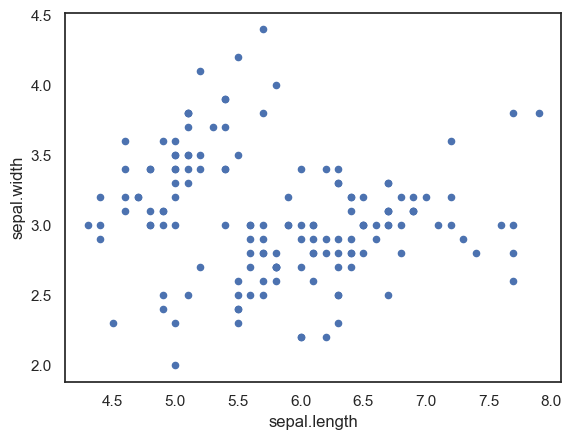

In [5]:
# The first way we can plot things is using the .plot extension from Pandas dataframes 
# We'll use this to make a scatterplot of the Iris features. 
iris.plot(kind="scatter", x="sepal.length", y="sepal.width")

<AxesSubplot:xlabel='sepal.length'>

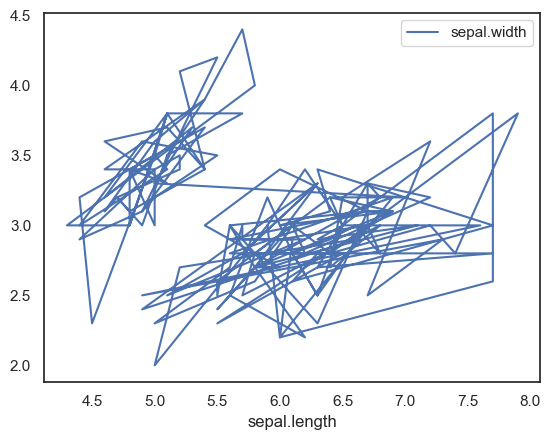

In [6]:
iris.plot(kind="line", x="sepal.length", y="sepal.width")

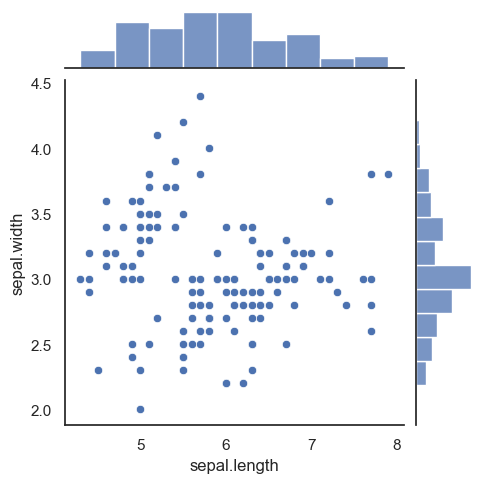

In [7]:
# We can also use the seaborn library to make a similar plot 
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure 

sns.jointplot(x="sepal.length", y="sepal.width", data=iris, size=5)

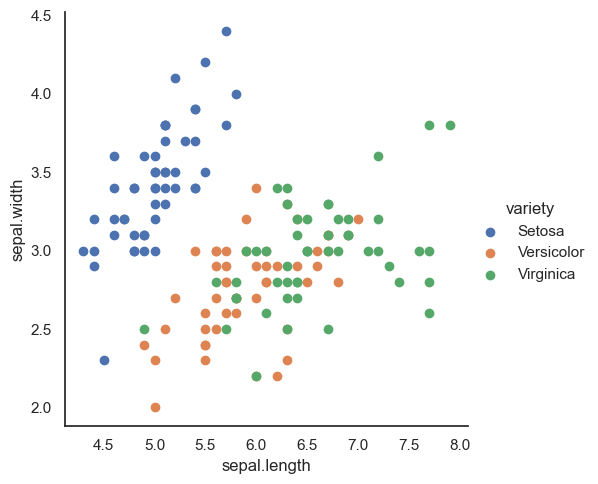

In [10]:
# One piece of information missing in the plots above is what species each plant is 
# We'll use seaborn's FacetGrid to color the scatterplot by species 

sns.FacetGrid(iris, hue="variety", size=5) \
.map(plt.scatter, "sepal.length", "sepal.width") \
.add_legend()

<AxesSubplot:xlabel='variety', ylabel='petal.length'>

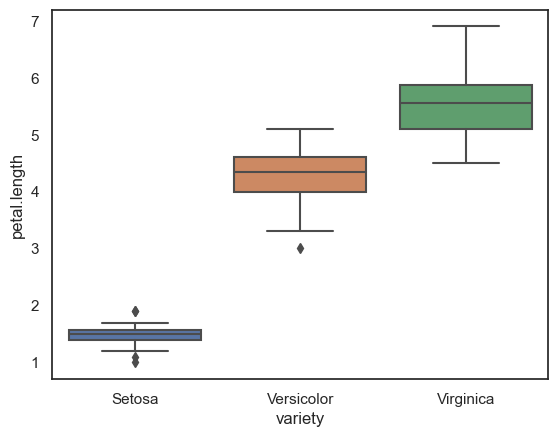

In [11]:
# We can look at an individual feature in Seaborn through a boxplot 
sns.boxplot(x="variety", y="petal.length", data=iris)

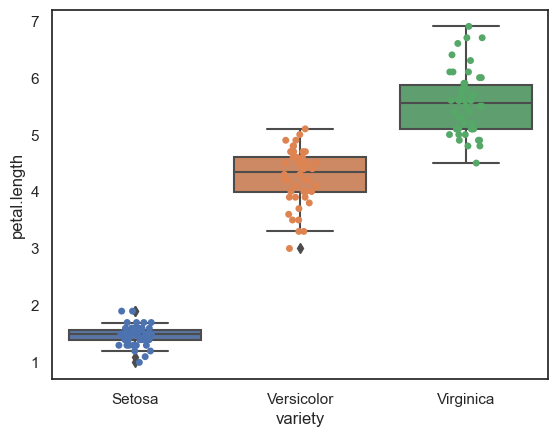

In [13]:
# One way we can extend this plot is adding a layer of individual points on top
# it through Seaborn's striplot 
# # We'll use jitter=True so that all the points don't fall in single vertical lines 
# above the species 
# # Saving the resulting axes as ax each time causes the resulting plot to be shown 
# on top of the previous axes

ax = sns.boxplot(x="variety", y="petal.length", data=iris)

ax = sns.stripplot(x="variety", y="petal.length", data=iris, jitter=True,edgecolor="gray")

<AxesSubplot:xlabel='variety', ylabel='petal.length'>

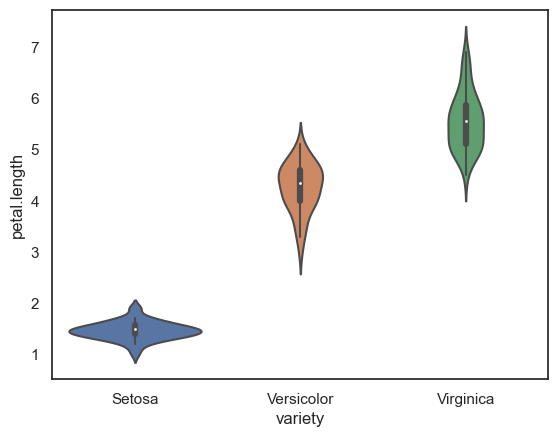

In [14]:
# A violin plot combines the benefits of the previous two plots and simplifies them 
# Denser regions of the data are fatter, and sparser thiner in a violin plot.

sns.violinplot(x="variety", y="petal.length", data=iris, size=6)

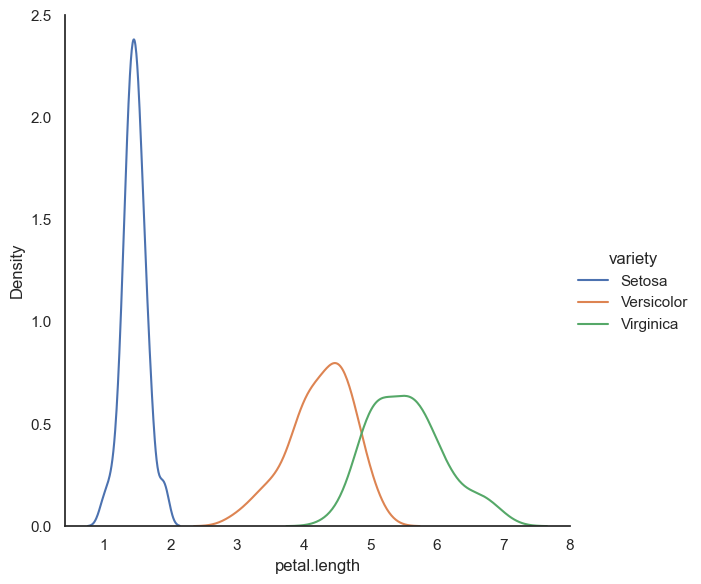

In [15]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot, 
# which creates and visualizes a kernel density estimate of the underlying feature 

sns.FacetGrid(iris, hue="variety", size=6).map(sns.kdeplot, "petal.length").add_legend()

In [19]:
iris.reset_index().head()

,index,sepal.length,sepal.width,petal.length,petal.width,variety
0,0,5.1,3.5,1.4,0.2,Setosa
1,1,4.9,3.0,1.4,0.2,Setosa
2,2,4.7,3.2,1.3,0.2,Setosa
3,3,4.6,3.1,1.5,0.2,Setosa
4,4,5.0,3.6,1.4,0.2,Setosa


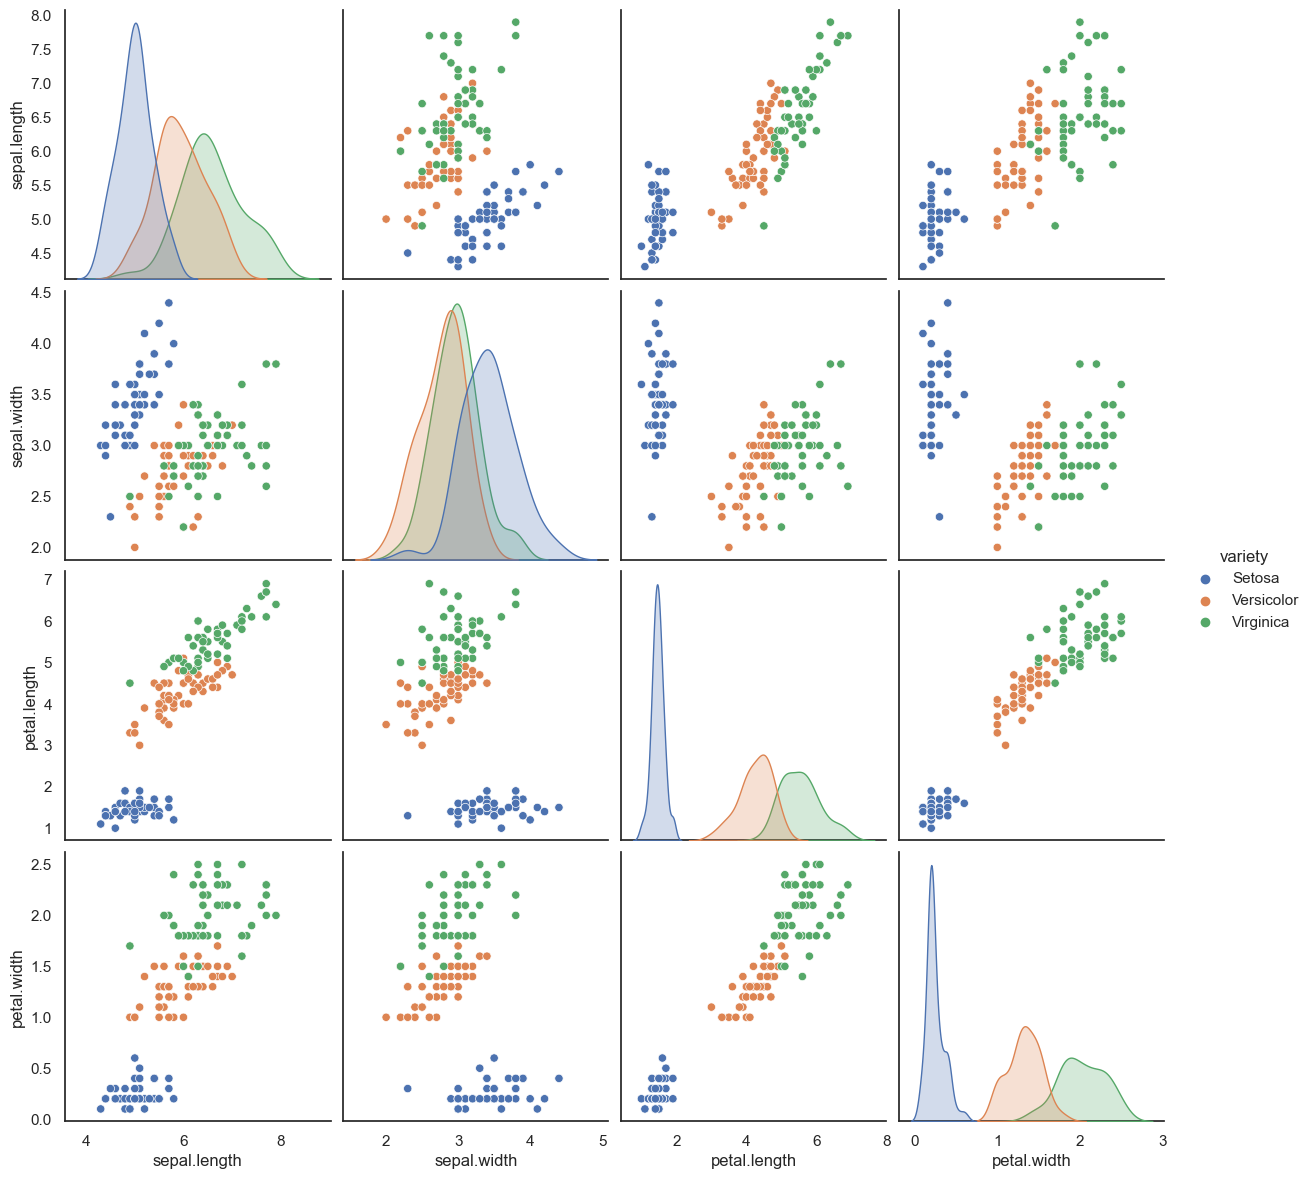

In [21]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation 
# between each pair of features 
# # From the pairplot, we'll see that the Iris-setosa species is separataed from the other 
# two across all feature combinations 

sns.pairplot(iris, hue="variety", size=3)

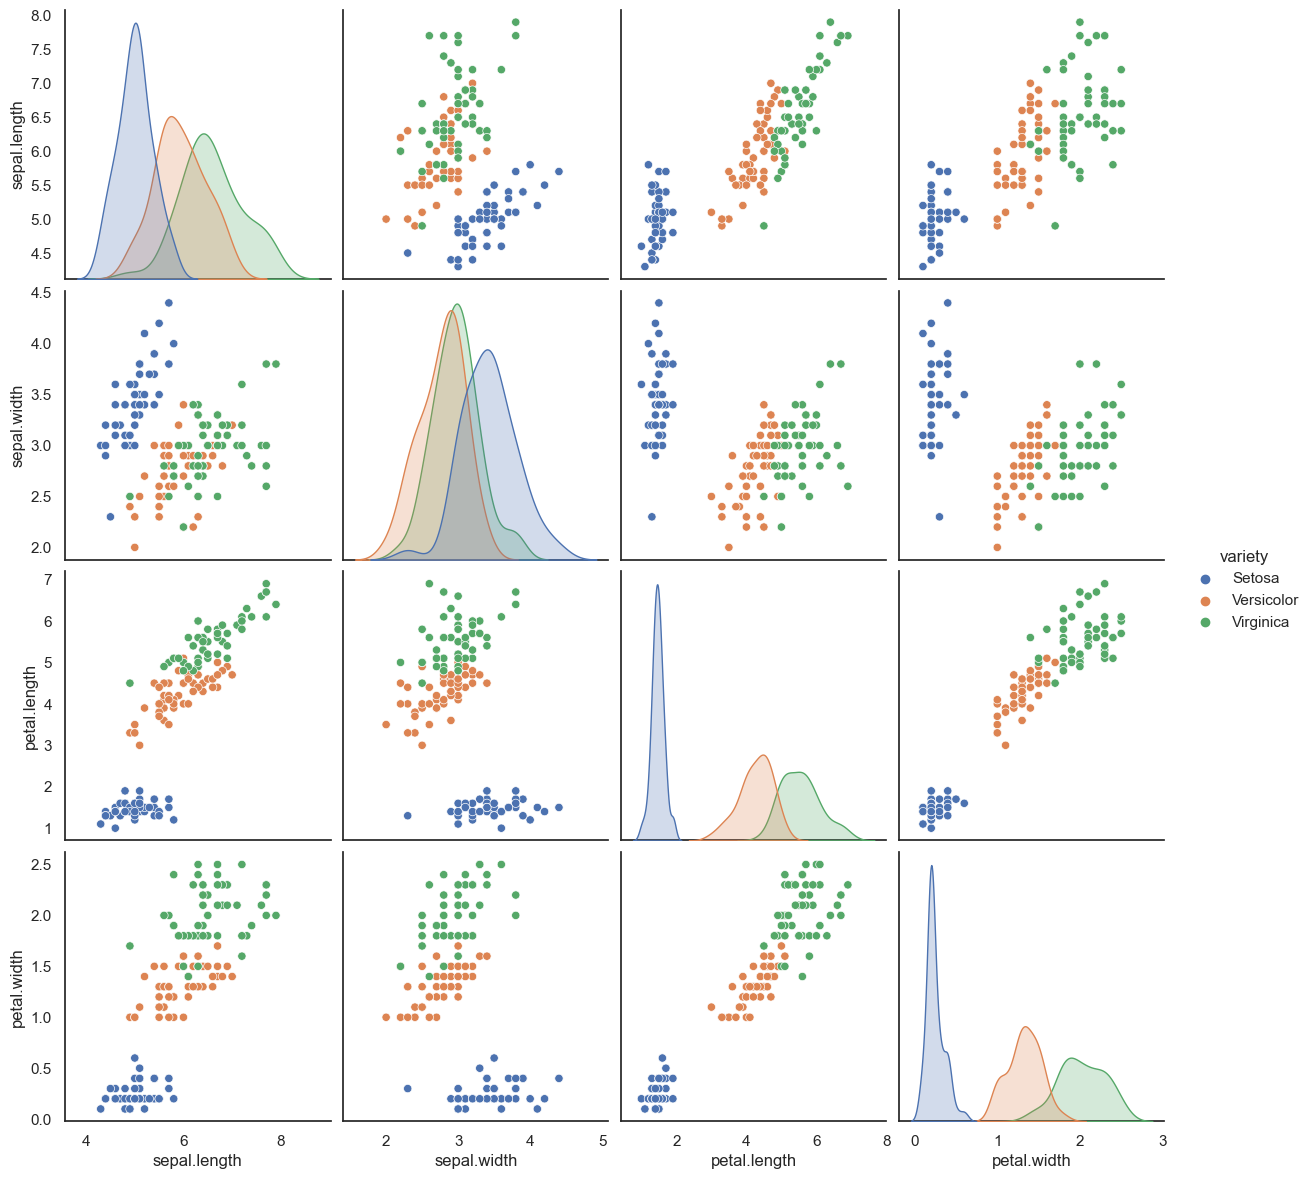

In [22]:
# The diagonal elements in a pairplot show the histogram by default 
# We can update these elements to show other things, such as a kde 

sns.pairplot(iris, hue="variety", size=3, diag_kind="kde")

array([[<AxesSubplot:title={'center':'petal.length'}, xlabel='[variety]'>,
        <AxesSubplot:title={'center':'petal.width'}, xlabel='[variety]'>],
       [<AxesSubplot:title={'center':'sepal.length'}, xlabel='[variety]'>,
        <AxesSubplot:title={'center':'sepal.width'}, xlabel='[variety]'>]],
      dtype=object)

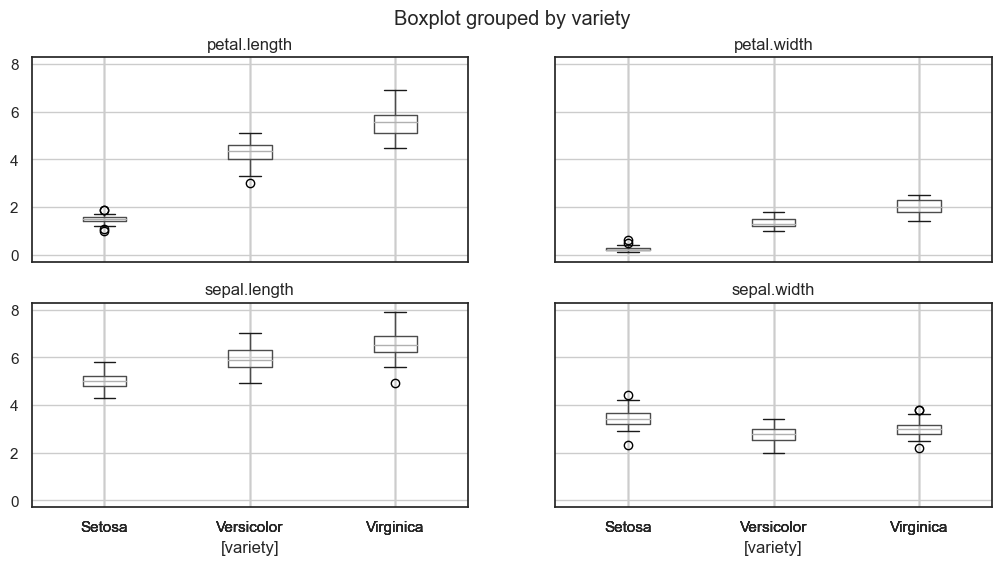

In [23]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas 
# We can quickly make a boxplot with Pandas on each feature split out by species 

iris.boxplot(by="variety", figsize=(12, 6))